### Load data

In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

load_dotenv()
DATA_PATH = os.getenv("DATA_PATH")

data = pd.read_csv(DATA_PATH+"articles_training.tsv", sep='\t')
data

,content,tags
0,"Bước vào trận đấu, Barcelona nhanh chóng tràn ...","La Liga,Sevilla,Olimpic Lluis Companys,đè bẹp,..."
1,Willian đi vào lịch sử bóng đá xứ samba. Với 1...,"Estevao Willian,Neymar,giải VĐQG Brazil,Serie ..."
2,Giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải Ba,Thượng Hải,đồng..."
3,Mục tiêu lớn Phó Thủ tướng Chính phủ Lê Thành ...,"đăng cai,Đại hội Thể thao châu Á,ASIAD,thể dục..."
4,"Ngày 20-10, Giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,Vũ Đặng Nhật Nam,Nguyễn Lê Truyề..."
...,...,...
99845,Tạo động lực phát triển nhanh và bền vững của ...,"Kỳ họp,Quốc hội,tư duy,Trần Thanh Mẫn,nguồn lự..."
99846,"Theo số liệu của Tổng cục Hải quan, trong 9 th...","cao su tự nhiên,cao su,ANRPC,Chứng khoán MB,nư..."
99847,Mong có chiến lược ứng phó hiệu quả với thiên ...,"Kỳ họp thứ Tám,Trần Thanh Mẫn,ngắn gọn,Chủ tịc..."
99848,"Nhà chức trách xác định, Hoàng Văn Thảo có hàn...","Hoàng Văn Thảo,chạy án,Cục phó,giả danh,TP Hồ ..."


### Clean data

In [2]:
def remove_tags(content, tags):
	removed = 0
	tag_list = tags.split(",")
	for tag in tag_list:
		if tag not in content:
			tag_list.remove(tag)
			removed += 1
	return ",".join(tag_list), removed


def too_short(content):
	return len(content) < 100

def too_much_tags(content, tags, ratio=0.5):
	if len(tags) > len(content)*ratio:
		return True

In [3]:
# Remove rows if the content is too short or if there are too much tags
for i in range(len(data)):
    if too_short(data.loc[i, "content"]) or too_much_tags(data.loc[i, "content"], data.loc[i, "tags"]):
        data = data.drop(i)

data = data.reset_index(drop=True)
data

,content,tags
0,"Bước vào trận đấu, Barcelona nhanh chóng tràn ...","La Liga,Sevilla,Olimpic Lluis Companys,đè bẹp,..."
1,Willian đi vào lịch sử bóng đá xứ samba. Với 1...,"Estevao Willian,Neymar,giải VĐQG Brazil,Serie ..."
2,Giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải Ba,Thượng Hải,đồng..."
3,Mục tiêu lớn Phó Thủ tướng Chính phủ Lê Thành ...,"đăng cai,Đại hội Thể thao châu Á,ASIAD,thể dục..."
4,"Ngày 20-10, Giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,Vũ Đặng Nhật Nam,Nguyễn Lê Truyề..."
...,...,...
97836,Tạo động lực phát triển nhanh và bền vững của ...,"Kỳ họp,Quốc hội,tư duy,Trần Thanh Mẫn,nguồn lự..."
97837,"Theo số liệu của Tổng cục Hải quan, trong 9 th...","cao su tự nhiên,cao su,ANRPC,Chứng khoán MB,nư..."
97838,Mong có chiến lược ứng phó hiệu quả với thiên ...,"Kỳ họp thứ Tám,Trần Thanh Mẫn,ngắn gọn,Chủ tịc..."
97839,"Nhà chức trách xác định, Hoàng Văn Thảo có hàn...","Hoàng Văn Thảo,chạy án,Cục phó,giả danh,TP Hồ ..."


buoc vao tran......La Liga....
O O OO     B-KEY I-KEY OOOOO

In [4]:
# Remove tags that are not in the content
removeds = []
for i in range(len(data)):
    data.loc[i, "tags"], removed = remove_tags(data.loc[i, "content"], data.loc[i, "tags"])
    removeds.append(removed)

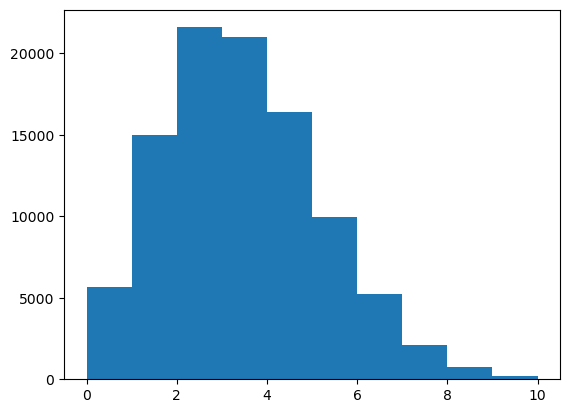

In [5]:
# Plot the number of removed tags
import matplotlib.pyplot as plt
plt.hist(removeds)
plt.show()

In [6]:
data

,content,tags
0,"Bước vào trận đấu, Barcelona nhanh chóng tràn ...","La Liga,Sevilla,Olimpic Lluis Companys,Lewando..."
1,Willian đi vào lịch sử bóng đá xứ samba. Với 1...,"Estevao Willian,Neymar,giải VĐQG Brazil,Serie ..."
2,Giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải Ba,Thượng Hải,vận ..."
3,Mục tiêu lớn Phó Thủ tướng Chính phủ Lê Thành ...,"đăng cai,Đại hội Thể thao châu Á,thể dục,Quyết..."
4,"Ngày 20-10, Giải bơi và lặn vô địch quốc gia n...","toàn đoàn,lặn,Vũ Đặng Nhật Nam,Nguyễn Lê Truyề..."
...,...,...
97836,Tạo động lực phát triển nhanh và bền vững của ...,"Kỳ họp,Quốc hội,tư duy,Trần Thanh Mẫn,nguồn lự..."
97837,"Theo số liệu của Tổng cục Hải quan, trong 9 th...","cao su tự nhiên,cao su,ANRPC,Chứng khoán MB,ch..."
97838,Mong có chiến lược ứng phó hiệu quả với thiên ...,"Kỳ họp thứ Tám,Trần Thanh Mẫn,ngắn gọn,Chủ tịc..."
97839,"Nhà chức trách xác định, Hoàng Văn Thảo có hàn...","Hoàng Văn Thảo,chạy án,Cục phó,giả danh,TP Hồ ..."


### Delete unusable

In [8]:
from transformers import AutoModel, AutoTokenizer

model_name = "FacebookAI/xlm-roberta-large"
model = AutoModel.from_pretrained(model_name)
print(model.config) # max_position_embeddings=514

XLMRobertaConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "FacebookAI/xlm-roberta-large",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}



In [9]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [10]:
def exceed_max_length(content, tokenizer, max_length=512):
    return len(tokenizer.encode(content)) > max_length

In [11]:
# Remove rows if the content exceed the max length
for i in range(len(data)):
    if exceed_max_length(data.loc[i, "content"], tokenizer):
        data = data.drop(i)

data

Token indices sequence length is longer than the specified maximum sequence length for this model (1033 > 512). Running this sequence through the model will result in indexing errors


,content,tags
0,"Bước vào trận đấu, Barcelona nhanh chóng tràn ...","La Liga,Sevilla,Olimpic Lluis Companys,Lewando..."
1,Willian đi vào lịch sử bóng đá xứ samba. Với 1...,"Estevao Willian,Neymar,giải VĐQG Brazil,Serie ..."
2,Giải vô địch ná cao su thế giới năm 2024 đã di...,"ná cao su,giải vô địch,giải Ba,Thượng Hải,vận ..."
7,Giải đấu khởi tranh từ ngày 13/10 đến ngày 20/...,"Trảng Bàng,thiếu niên,thị xã,cao thượng,Gia Lộ..."
9,Giải vô địch Karate quốc gia lần thứ 33 năm 20...,"Nguyễn Thị Bảo Ngọc,Hoàng Thị Mỹ Tâm,huy chươn..."
...,...,...
97828,"Ngày 16/8, tại Công an tỉnh Thái Bình, Bộ Công...","Trần Xuân Ánh,Công an tỉnh Thái Bình,giữ chức ..."
97830,"(từ ngày 1-10), lực lượng đã kiểm tra, xử phạt...","Trảng Bom,Công an huyện Trảng Bom,xử phạt,THPT..."
97832,Thủ tướng Trung Quốc Lý Cường đang có chuyến t...,"đà phát triển,Lý Cường,đối tác,quan hệ,năm,vốn..."
97833,"Các đoàn xuất quân “Ứng cứu thông tin, khắc ph...","VNPT Bình Dương,Yagi,bão,Bắc Giang,hậu quả,khô..."


In [12]:
# Save the cleaned data
data.to_csv(DATA_PATH+"articles_training_xlm.tsv", sep='\t', index=False)